# Classification model using KNN

### 1. Import libraries

In [1]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

### 2. Upload Clinic data

In [2]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_multiclass_200.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:202  ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
0,2,0.436414,-1.576482,2.176638,1.046650,-0.967788,-0.332760,-0.586029,1.430570,-0.895583,...,-0.928760,0.075799,-0.263159,-0.655430,1.285033,1.158913,-0.501004,-1.361494,0.612884,0.746754
1,1,-0.032149,-0.995621,1.888060,1.284731,0.079140,0.064063,-0.199813,1.521006,0.564534,...,0.483468,-0.893442,0.575146,-0.778792,0.324170,0.177823,-1.233956,-1.483099,-0.341608,-0.996777
2,2,0.476933,-2.010775,1.879018,0.383090,0.207985,-0.992632,0.020097,0.387833,-1.122965,...,0.017044,0.602836,-1.916266,1.144584,1.069570,0.535930,-0.897938,-1.371405,-0.231251,-0.274360
3,0,0.547395,-0.711453,1.527116,1.052659,0.077064,0.006284,-0.112697,1.186751,0.211799,...,0.633414,-0.524010,0.202187,-0.838269,-0.029785,0.492356,-1.486459,-1.970962,0.530672,-0.985897
4,1,-0.624718,-2.406139,2.824231,-0.012635,-1.314704,-0.748785,0.687588,2.262579,-0.263327,...,0.454670,-0.789785,-0.452545,1.738423,0.543774,0.753638,-1.839001,-0.347618,0.589409,-1.081583


In [3]:
Y = data.Target # Target column

X = data.iloc[:,1:202] # I selected all the columns by removing the Unnamed column (row id) and the Target column.


print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0    0.436414 -1.576482  2.176638  1.046650 -0.967788 -0.332760 -0.586029   
1   -0.032149 -0.995621  1.888060  1.284731  0.079140  0.064063 -0.199813   
2    0.476933 -2.010775  1.879018  0.383090  0.207985 -0.992632  0.020097   
3    0.547395 -0.711453  1.527116  1.052659  0.077064  0.006284 -0.112697   
4   -0.624718 -2.406139  2.824231 -0.012635 -1.314704 -0.748785  0.687588   
..        ...       ...       ...       ...       ...       ...       ...   
176  0.152039 -1.448956  1.631890  0.438465 -0.797802 -0.450635 -0.031156   
177  1.139950 -1.364696  0.767903  0.954542  0.358079 -0.439770  0.195097   
178  0.291298 -2.023891  1.954019  1.072944 -0.490579 -0.466329  0.094765   
179  0.102469 -0.451807  1.057516  0.105644 -0.375693 -0.814802  0.114747   
180  0.794935 -1.928761  0.771840  0.929302 -0.237190 -0.890115  0.127341   

            7         8         9  ...       190       191       192  \
0  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125,stratify=Y)
yTrain=yTrain.to_numpy()
yTest=yTest.to_numpy()
print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Study the best value for K

In [5]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 5 and is: 0.4054


C:\Users\sandr\AppData\Local\Temp/ipykernel_1992/3738168230.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
C:\Users\sandr\AppData\Local\Temp/ipykernel_1992/3738168230.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(best_k, best_acuracy, 'ro', color ='g')


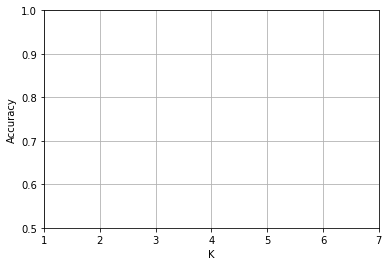

In [6]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# Green dot represent best K value
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 5. Best metric study (manhattan or euclidean)

In [7]:
from sklearn import neighbors
# Euclidean distance model
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

# Manhattan distance model
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x000001C86531C280>)

In [8]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,0,0,0
1,1,1,1
2,0,0,0
3,2,0,0
4,0,1,1


In [9]:
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Best result of the cross validation of the model (euclidean) with the best paramters:" +str(np.mean(result1)))
print("Best result of the cross validation of the model (manhattan) with the best paramters:" +str(np.mean(result2)))

Best result of the cross validation of the model (euclidean) with the best paramters:0.47955665024630545
Best result of the cross validation of the model (manhattan) with the best paramters:0.48645320197044334


#### 6.1. Manhattan model

In [10]:
# Making predictions with the optimal model on the training dataset
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [11]:
# Making predictions with the optimal model on the test dataset
mayhatTest = manhattan_model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [12]:
print('Precisión final en el conjunto de datos de entrenamiento (manhattan): ' + str(contTrain/len(yTrain)))
print('Precisión final en el conjunto de datos de prueba (manhattan): ' + str(contTest/len(yTest)))

Precisión final en el conjunto de datos de entrenamiento (manhattan): 0.6597222222222222
Precisión final en el conjunto de datos de prueba (manhattan): 0.32432432432432434


In [13]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[55  5  7]
 [10  7  8]
 [17  2 33]]
Input data:  [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]
Prediction:        [0 0 2 0 0 2 0 0 0 0 2 0 1 0 0 2 0 1 0 0 1 0 0 2 2 0 0 0 0 0 2 2 2 0 0 0 2
 2 0 0 0 2 2 1 2 2 0 0 1 0 0 0 2 0 0 2 0 2 0 2 1 0 2 0 2 0 0 2 2 2 0 0 0 0
 0 0 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 2 0 2 1 2 2 0 2 0 2 2 0 1 2 2 2 2 1 2 2
 2 2 0 1 0 0 0 0 0 0 0 2 0 0 2 0 2 0 0 0 2 0 1 0 0 0 1 2 2 0 0 0 2]


In [14]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74        67
           1       0.50      0.28      0.36        25
           2       0.69      0.63      0.66        52

    accuracy                           0.66       144
   macro avg       0.62      0.58      0.59       144
weighted avg       0.65      0.66      0.64       144



In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(mayhatTest))

----------------Confusion Matrix (Test)------------------
[[ 9  5  4]
 [ 1  1  4]
 [10  1  2]]
Input data:  [0 1 0 2 0 2 1 0 1 0 2 2 1 2 2 0 1 2 0 0 0 2 1 0 0 2 0 2 2 0 0 0 2 2 0 0 0]
Prediction:        [0 1 0 0 1 0 2 2 0 0 0 1 2 2 0 1 2 0 0 1 0 0 2 1 1 0 0 2 0 2 0 0 0 0 2 2 0]


In [16]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.45      0.50      0.47        18
           1       0.14      0.17      0.15         6
           2       0.20      0.15      0.17        13

    accuracy                           0.32        37
   macro avg       0.26      0.27      0.27        37
weighted avg       0.31      0.32      0.32        37

